# Problem Statment

A bike-sharing system is a service in which bikes are made available for shared use to
individuals on a short-term basis for a price or free. Many bike share systems allow people to
borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the
payment information, and the system unlocks it. This bike can then be returned to another
dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their
revenues due to the ongoing Corona pandemic. The company is finding it very difficult to
sustain in the current market scenario. So, it has decided to come up with a mindful business
plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end,
and the economy restores to a healthy state.

### Reading and Understanding the Data

Let us first import libraries

In [93]:
import numpy as np
import pandas as pd
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#visualising data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [94]:
day_data=pd.read_csv('day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [95]:
day_data.shape

(730, 16)

In [96]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No missing values here...

In [97]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Preprocessing 

### Drop the columns

Dropping the columns casual and registered, because these two are not features and some of these variable is our target variable 'cnt'.


Dropping column 'instant', since its not feature just index of record 

Dropping column 'dteday', since mnth,yr,weekday information available 

In [98]:
day_data.pop('casual')
day_data.pop('registered')
day_data.pop('instant')
day_data.pop('dteday')

0      01-01-2018
1      02-01-2018
2      03-01-2018
3      04-01-2018
4      05-01-2018
          ...    
725    27-12-2019
726    28-12-2019
727    29-12-2019
728    30-12-2019
729    31-12-2019
Name: dteday, Length: 730, dtype: object

In [99]:
day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Mapping correct values to categorical values

In [100]:
# Map weekday column
varlist1=['weekday']
# Defining the map function
def weekday_map(x):
    return x.map({5:'SUN',6:'MON',0:'TUE',1:'WED',2:'THU',3:'FRI',4:'SAT'})

# Applying the function to the day_data list
day_data[varlist1] = day_data[varlist1].apply(weekday_map)
day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,MON,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,TUE,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,WED,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,THU,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,FRI,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [101]:
# Map season column
varlist2=['season']
# Defining the map function
def season_map(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})

# Applying the function to the day_data list
day_data[varlist2] = day_data[varlist2].apply(season_map)
day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,MON,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,TUE,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,WED,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,THU,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,FRI,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [102]:
# Map mnth column
varlist3=['mnth']
# Defining the map function
def mnth_map(x):
    return x.map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'})

# Applying the function to the day_data list
day_data[varlist3] = day_data[varlist3].apply(mnth_map)
day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,JAN,0,MON,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,JAN,0,TUE,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,JAN,0,WED,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,JAN,0,THU,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,JAN,0,FRI,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [103]:
# Map weathersit column
varlist4=['weathersit']
# Defining the map function
def weathersit_map(x):
    return x.map({1:'Clear',
                  2:'Mist',
                  3:'Light Snow',
                  4:'Heavy Rain'})

# Applying the function to the day_data list
day_data[varlist4] = day_data[varlist4].apply(weathersit_map)
day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,JAN,0,MON,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,JAN,0,TUE,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,JAN,0,WED,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,JAN,0,THU,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,JAN,0,FRI,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualising Data (EDA)

#### Univariant Analysis
let us figure out the outliers for numeric columns

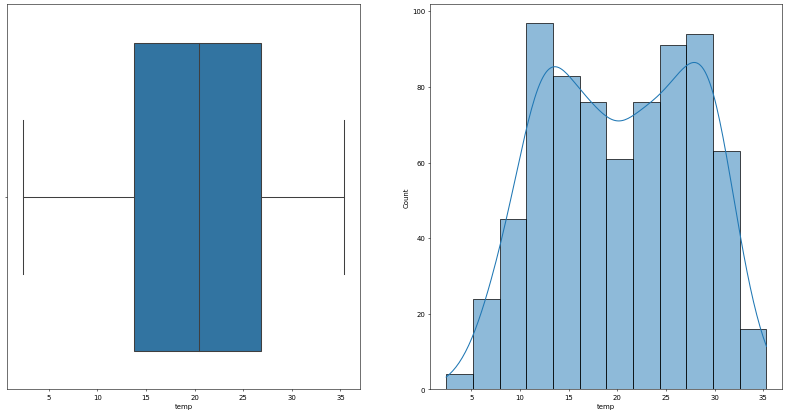

In [104]:
#temp var analysis
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=day_data['temp']);
sns.histplot(ax=axes[1], x=day_data['temp'],kde=True);

no outlier in temp variable

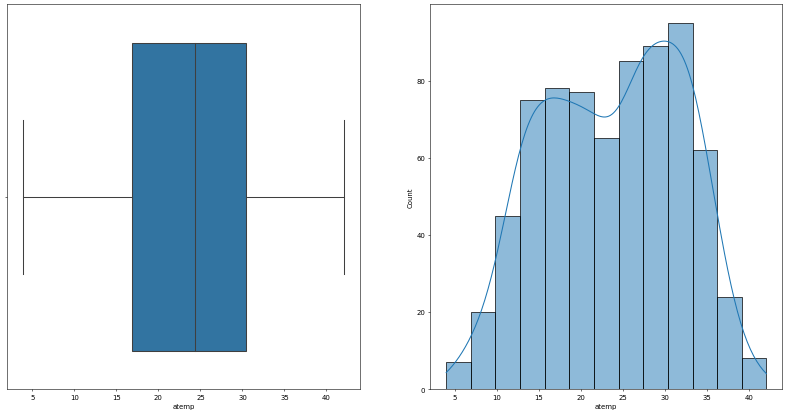

In [105]:
#atemp var analysis
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=day_data['atemp']);
sns.histplot(ax=axes[1], x=day_data['atemp'],kde=True);

#no outlier in atemp variable

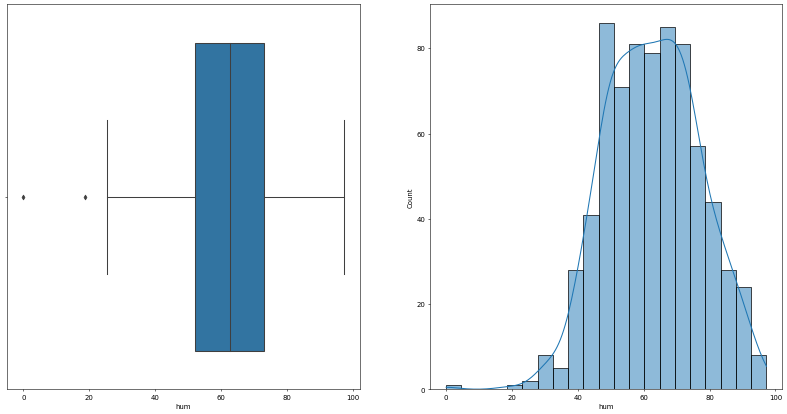

In [106]:
#hum var analysis
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=day_data['hum']);
sns.histplot(ax=axes[1], x=day_data['hum'],kde=True);

#no major outlier in hum variable

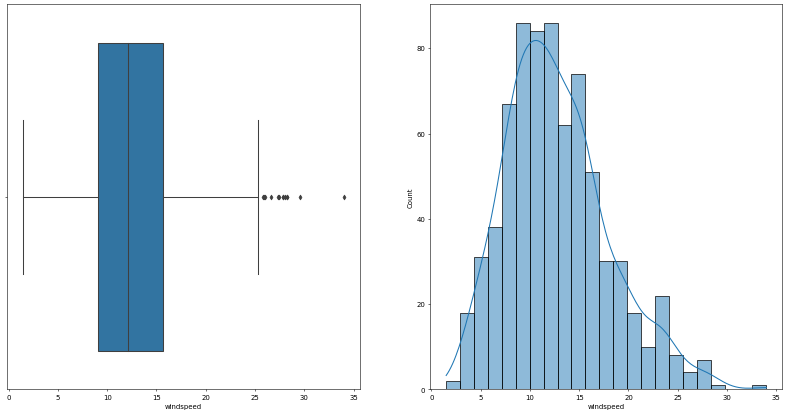

In [107]:
#windspeed var analysis
fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
sns.boxplot(ax=axes[0], x=day_data['windspeed']);
sns.histplot(ax=axes[1], x=day_data['windspeed'],kde=True);

#no major windspeed in hum variable

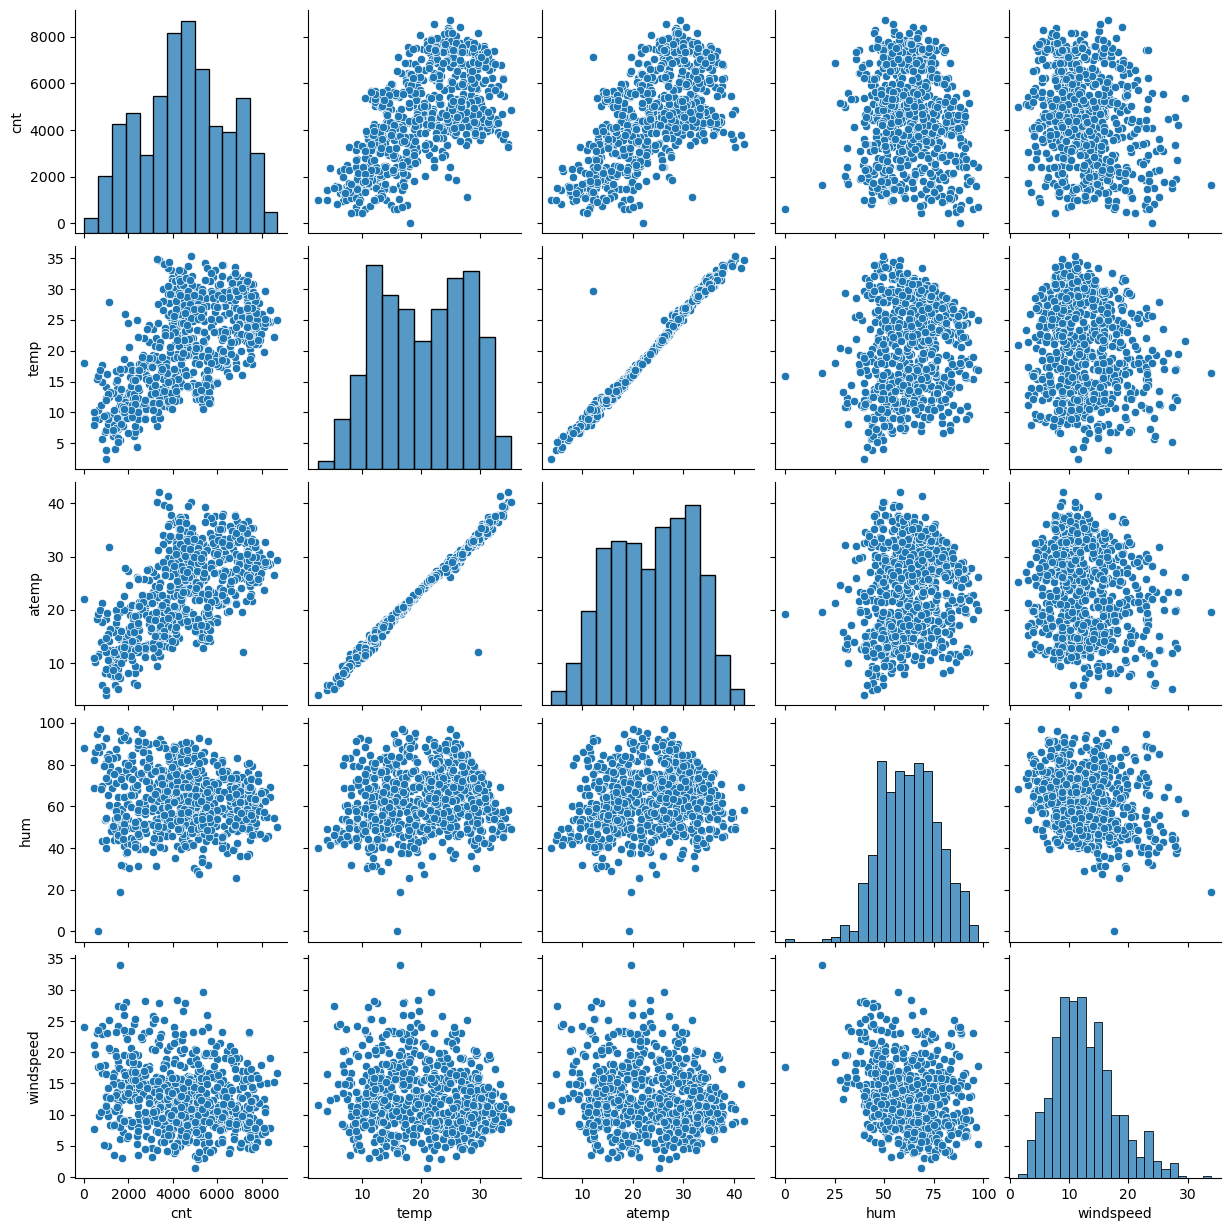

In [108]:
#visualising numeric values
daydata_in=day_data[['cnt','temp','atemp','hum','windspeed']]
sns.pairplot(daydata_in)
plt.show()

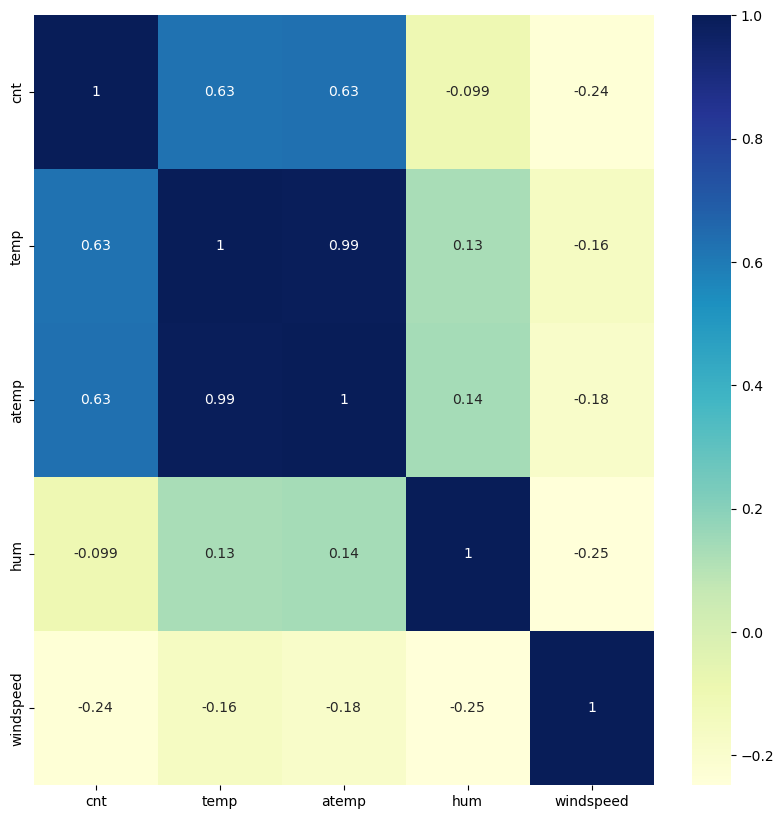

In [109]:
plt.figure(figsize = (10, 10))
sns.heatmap(daydata_in.corr(), annot = True, cmap="YlGnBu")
plt.show()

###### temp and atemp are highly correlated

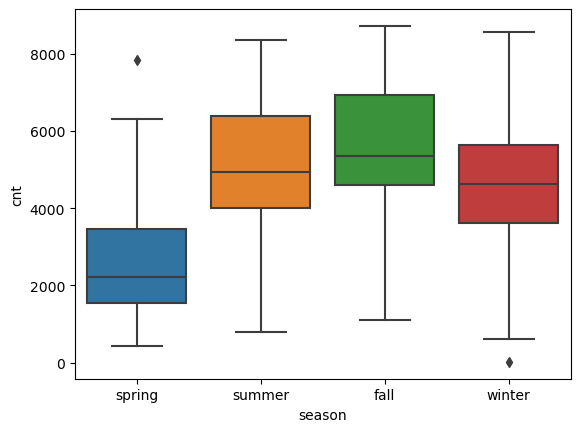

In [110]:
#visualising categorical variable
plt.figure()
sns.boxplot(x='season',y='cnt',data=day_data)
plt.show()



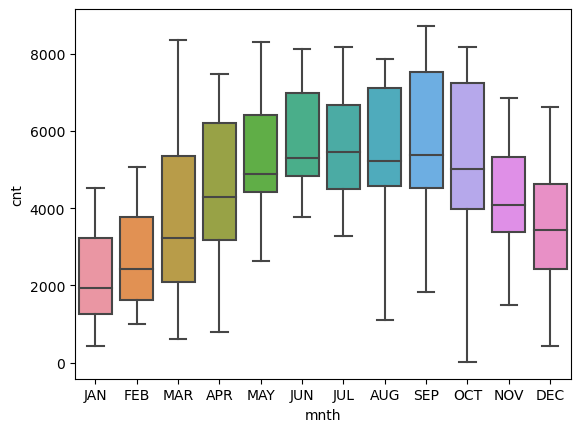

In [111]:
plt.figure()
sns.boxplot(x='mnth',y='cnt',data=day_data)
plt.show()

<Axes: xlabel='holiday', ylabel='cnt'>

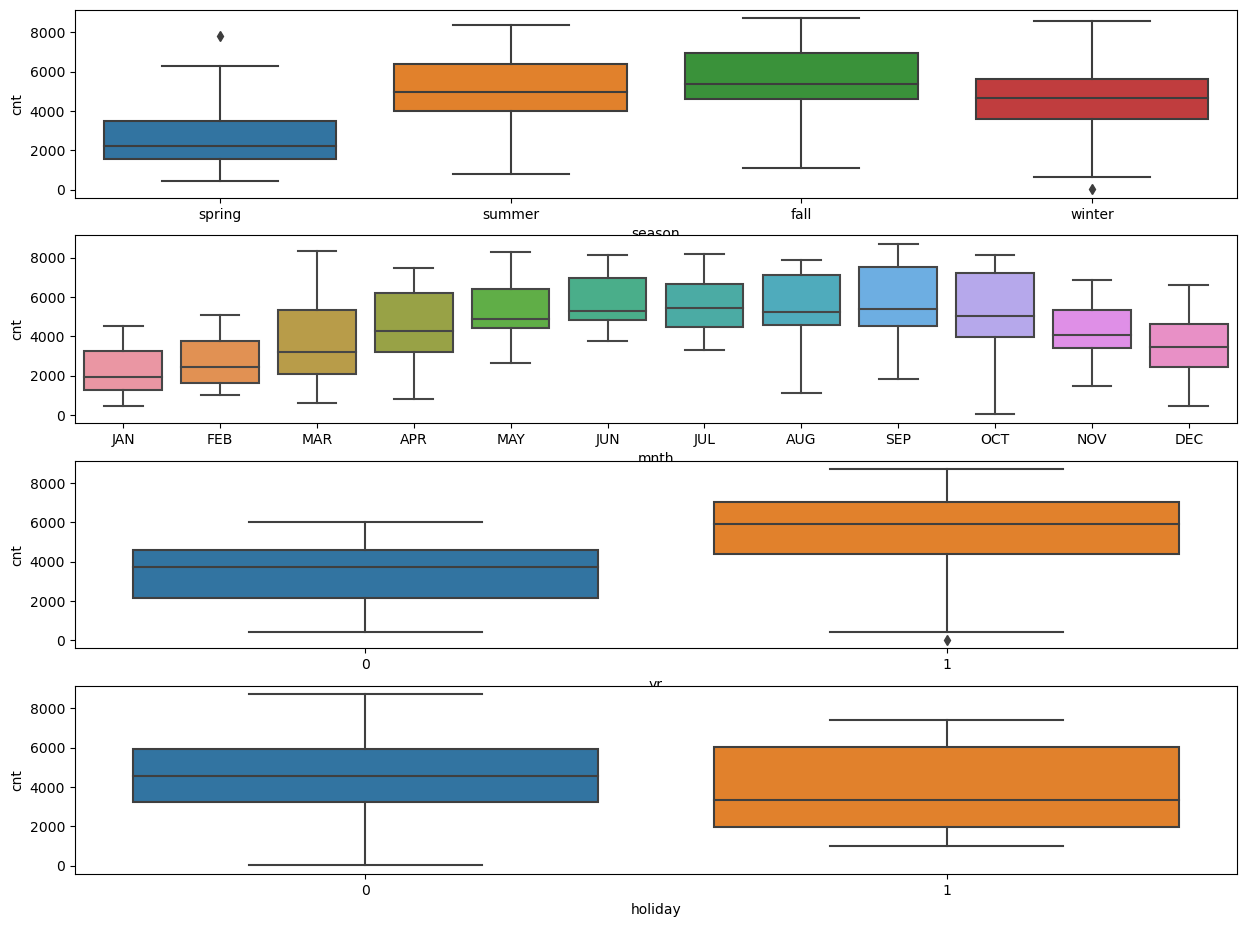

In [112]:
plt.figure(figsize=(15,20))

plt.subplot(7,1,1)
sns.boxplot(x='season',y='cnt',data=day_data)

plt.subplot(7,1,2)
sns.boxplot(x='mnth',y='cnt',data=day_data)

plt.subplot(7,1,3)
sns.boxplot(x='yr',y='cnt',data=day_data)

plt.subplot(7,1,4)
sns.boxplot(x='holiday',y='cnt',data=day_data)


<Axes: xlabel='weekday', ylabel='cnt'>

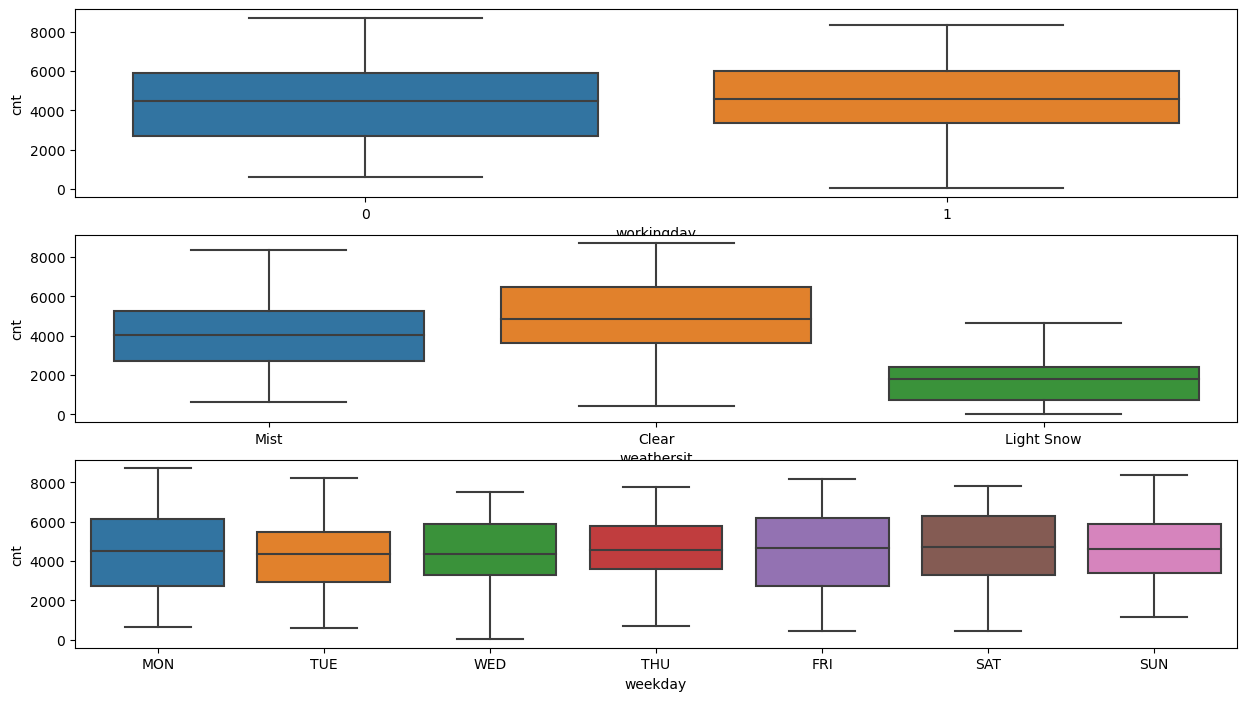

In [113]:
plt.figure(figsize=(15,20))

plt.subplot(7,1,1)
sns.boxplot(x='workingday',y='cnt',data=day_data)

plt.subplot(7,1,2)
sns.boxplot(x='weathersit',y='cnt',data=day_data)

plt.subplot(7,1,3)
sns.boxplot(x='weekday',y='cnt',data=day_data)

### dummy variable creation for categorical variable
season,mnth,weathersit,weekday

In [114]:
# dummy variable creation for 'season' variable

# Let's drop the first column from season_d df using 'drop_first = True'
season_d = pd.get_dummies(day_data['season'], drop_first = True)
season_d

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [115]:
# Add the results to the original day_data dataframe

day_data = pd.concat([day_data, season_d], axis = 1)
day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,JAN,0,MON,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,JAN,0,TUE,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,JAN,0,WED,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,JAN,0,THU,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,JAN,0,FRI,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [116]:
# remove variable 'season' from day_data dataframe
day_data=day_data.drop(['season'], axis=1)
day_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,JAN,0,MON,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,JAN,0,TUE,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,JAN,0,WED,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,JAN,0,THU,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,JAN,0,FRI,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [117]:
# dummy variable creation for 'mnth' variable

# Let's drop the first column from mnth_d df using 'drop_first = True'
mnth_d = pd.get_dummies(day_data['mnth'], drop_first = True)
mnth_d

,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [118]:
# Add the results to the original day_data dataframe

day_data = pd.concat([day_data, mnth_d], axis = 1)
day_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP
0,0,JAN,0,MON,0,Mist,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,0,JAN,0,TUE,0,Mist,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,0,JAN,0,WED,1,Clear,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,0,JAN,0,THU,1,Clear,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,0,JAN,0,FRI,1,Clear,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [119]:
# remove variable 'season' from day_data dataframe
day_data=day_data.drop(['mnth'], axis=1)
day_data.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP
0,0,0,MON,0,Mist,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,TUE,0,Mist,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,WED,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,THU,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,FRI,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [120]:

# dummy variable creatin for 'weathersit' variable

# Let's drop the first column from weathersit_d df using 'drop_first = True'
weathersit_d = pd.get_dummies(day_data['weathersit'], drop_first = True)
weathersit_d

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [121]:
# Add the results to the original day_data dataframe

day_data = pd.concat([day_data, weathersit_d], axis = 1)
day_data.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,Light Snow,Mist
0,0,0,MON,0,Mist,14.110847,18.18125,80.5833,10.749882,985,...,1,0,0,0,0,0,0,0,0,1
1,0,0,TUE,0,Mist,14.902598,17.68695,69.6087,16.652113,801,...,1,0,0,0,0,0,0,0,0,1
2,0,0,WED,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,1,0,0,0,0,0,0,0,0,0
3,0,0,THU,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,1,0,0,0,0,0,0,0,0,0
4,0,0,FRI,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,1,0,0,0,0,0,0,0,0,0


In [122]:
# remove variable 'weathersit' from day_data dataframe
day_data=day_data.drop(['weathersit'], axis=1)
day_data.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,Light Snow,Mist
0,0,0,MON,0,14.110847,18.18125,80.5833,10.749882,985,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,TUE,0,14.902598,17.68695,69.6087,16.652113,801,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0,WED,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,THU,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,FRI,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,1,0,0,0,0,0,0,0,0,0


In [123]:
# dummy variable creatin for 'weekday' variable

# Let's drop the first column from weekday_d df using 'drop_first = True'
weekday_d = pd.get_dummies(day_data['weekday'], drop_first = True)
weekday_d

,MON,SAT,SUN,THU,TUE,WED
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,1,0,0,0,0
726,0,0,1,0,0,0
727,1,0,0,0,0,0
728,0,0,0,0,1,0


In [124]:
# Add the results to the original day_data dataframe

day_data = pd.concat([day_data, weekday_d], axis = 1)
day_data.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,OCT,SEP,Light Snow,Mist,MON,SAT,SUN,THU,TUE,WED
0,0,0,MON,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,1,1,0,0,0,0,0
1,0,0,TUE,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,WED,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,THU,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,FRI,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [125]:
# remove variable 'weathersit' from day_data dataframe
day_data=day_data.drop(['weekday'], axis=1)
day_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,OCT,SEP,Light Snow,Mist,MON,SAT,SUN,THU,TUE,WED
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


### Train & Test data split

In [126]:
#Train & Test data split
df_train, df_test = train_test_split(day_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [127]:
df_train.shape

(510, 30)

In [128]:
df_test.shape

(219, 30)

### Rescaling the Features

rescale numeric features

In [129]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,OCT,SEP,Light Snow,Mist,MON,SAT,SUN,THU,TUE,WED
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,1,0,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,1,0,0,0,0,0


In [130]:

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,OCT,SEP,Light Snow,Mist,MON,SAT,SUN,THU,TUE,WED
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,1,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,1,0,0,0,0,0


In [131]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,OCT,SEP,Light Snow,Mist,MON,SAT,SUN,THU,TUE,WED
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.029412,0.343137,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.169124,0.475223,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


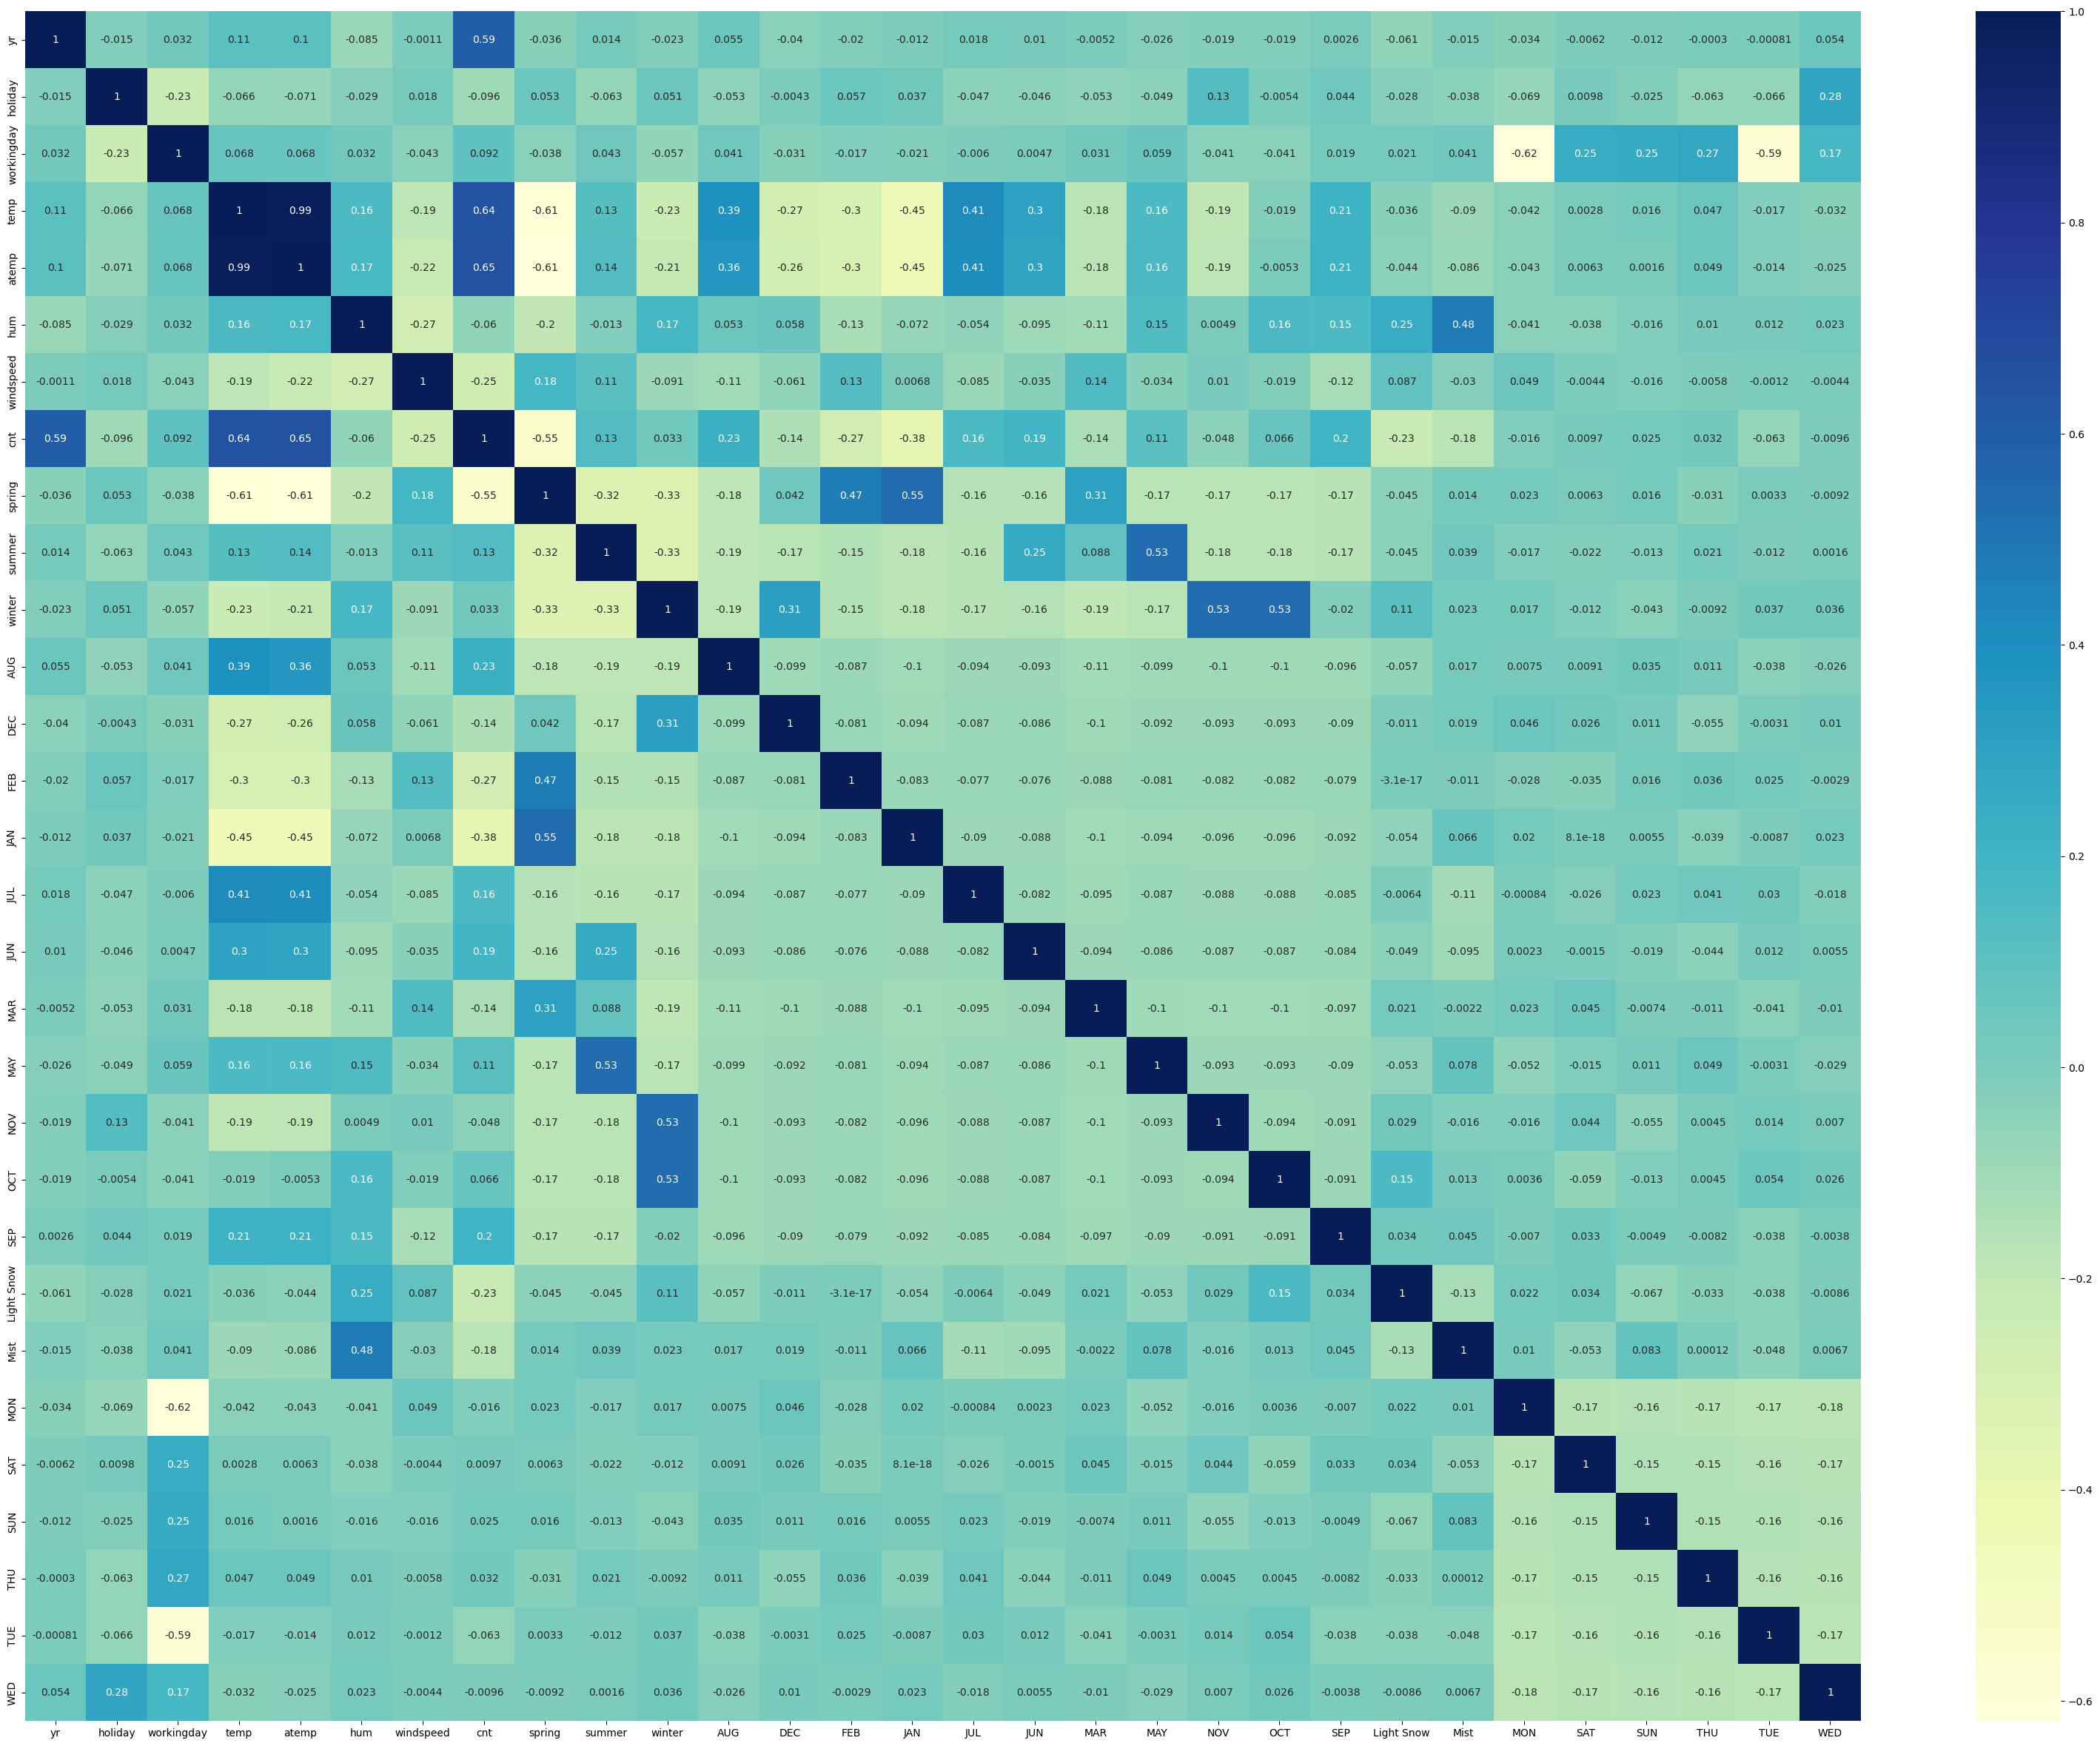

In [132]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, temp seems to the correlated to cnt the most. Let's see a pairplot for temp vs cnt

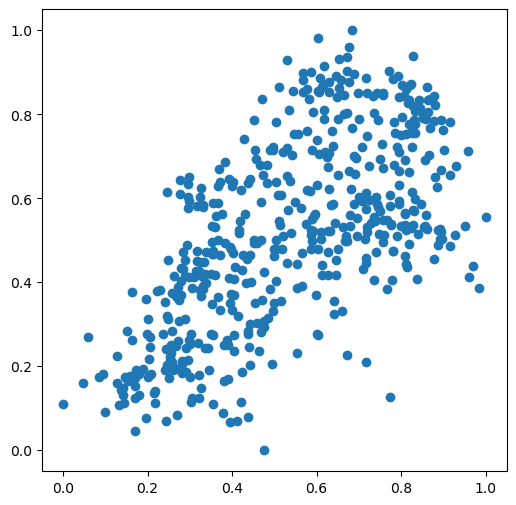

In [133]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [134]:
y_train = df_train.pop('cnt')
X_train = df_train

## Model building

### RFE
Recursive feature elimination

In [135]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [136]:
# Running RFE with the output number of the variable equal to 1
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [137]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1),
 ('AUG', False, 9),
 ('DEC', False, 4),
 ('FEB', False, 5),
 ('JAN', False, 2),
 ('JUL', True, 1),
 ('JUN', False, 10),
 ('MAR', False, 11),
 ('MAY', False, 6),
 ('NOV', False, 3),
 ('OCT', False, 15),
 ('SEP', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('MON', True, 1),
 ('SAT', False, 13),
 ('SUN', False, 14),
 ('THU', False, 8),
 ('TUE', True, 1),
 ('WED', False, 7)]

In [138]:
col1 = X_train.columns[rfe.support_]
col1

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'JUL', 'SEP', 'Light Snow', 'Mist', 'MON', 'TUE'],
      dtype='object')

### Building model using statsmodel

In [139]:
#Creating X_test dataframe with RFE selected variables
X_train_rfe1 = X_train[col1]

In [140]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [141]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model

In [142]:
#Let's see the summary of first linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.74e-189
Time:                        14:16:30   Log-Likelihood:                 511.86
No. Observations:                 510   AIC:                            -993.7
Df Residuals:                     495   BIC:                            -930.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2406      0.025      9.527      0.0

## calculate VIF

In [143]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
14,MON,inf
15,TUE,inf
4,temp,52.86
5,atemp,51.51
8,spring,2.55
6,hum,1.90
9,winter,1.79
13,Mist,1.57


### Since multicollinearity available in lm1 model
#### will remove the feature ('holiday') , since its has higher p-value

In [144]:
X_train_rfe2 = X_train_rfe1
X_train_rfe2=X_train_rfe2.drop(['holiday'], axis = 1)
X_train_rfe2.head()

,const,yr,workingday,temp,atemp,hum,windspeed,spring,winter,JUL,SEP,Light Snow,Mist,MON,TUE
653,1.0,1,1,0.509887,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0
576,1.0,1,1,0.815169,0.766351,0.725633,0.264686,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,1
482,1.0,1,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,0,1,1,0


In [145]:
# Adding a constant variable 
X_train_rfe2 = sm.add_constant(X_train_rfe2)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model

#Let's see the summary of second linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.74e-189
Time:                        14:16:34   Log-Likelihood:                 511.86
No. Observations:                 510   AIC:                            -993.7
Df Residuals:                     495   BIC:                            -930.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2323      0.040      5.835      0.0

### calculate VIF for the new model

In [146]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,99.72
3,temp,52.86
4,atemp,51.51
2,workingday,9.09
13,MON,6.07
14,TUE,5.75
7,spring,2.55
5,hum,1.90
8,winter,1.79
12,Mist,1.57


#### will remove 'atemp' feature and build the model, since its multicollinearity

In [147]:
X_train_rfe3 = X_train_rfe2
X_train_rfe3=X_train_rfe3.drop(["atemp"], axis = 1)
X_train_rfe3.head()

,const,yr,workingday,temp,hum,windspeed,spring,winter,JUL,SEP,Light Snow,Mist,MON,TUE
653,1.0,1,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,1,1,0


In [148]:
# Adding a constant variable 
X_train_rfe3 = sm.add_constant(X_train_rfe3)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model

#Let's see the summary of third linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.81e-190
Time:                        14:16:36   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2331      0.040      5.857      0.0

In [149]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,99.67
2,workingday,9.07
12,MON,6.06
13,TUE,5.74
3,temp,2.99
6,spring,2.55
4,hum,1.89
7,winter,1.78
11,Mist,1.57
8,JUL,1.30


### will remove 'workingday' feature and build the model

In [150]:
X_train_rfe4 = X_train_rfe3
X_train_rfe4=X_train_rfe4.drop(["workingday"], axis = 1)
X_train_rfe4.head()

,const,yr,temp,hum,windspeed,spring,winter,JUL,SEP,Light Snow,Mist,MON,TUE
653,1.0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,0,0,0,1,1,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1
482,1.0,1,0.395666,0.504508,0.188475,0,0,0,0,0,1,1,0


In [151]:
# Adding a constant variable 
X_train_rfe4 = sm.add_constant(X_train_rfe4)

lm4 = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model

#Let's see the summary of fourth linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.8
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.15e-188
Time:                        14:16:39   Log-Likelihood:                 503.25
No. Observations:                 510   AIC:                            -980.5
Df Residuals:                     497   BIC:                            -925.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3339      0.031     10.641      0.0

In [152]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.15
2,temp,2.99
5,spring,2.54
3,hum,1.89
6,winter,1.77
10,Mist,1.57
7,JUL,1.30
9,Light Snow,1.24
4,windspeed,1.17
8,SEP,1.10


### will remove 'MON' feature and build the model

In [153]:
X_train_rfe5 = X_train_rfe4
X_train_rfe5=X_train_rfe4.drop(["MON"], axis = 1)
X_train_rfe5.head()

,const,yr,temp,hum,windspeed,spring,winter,JUL,SEP,Light Snow,Mist,TUE
653,1.0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,0,1,0,0,0,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,0,0,0,1,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,0,0,0,0,1
482,1.0,1,0.395666,0.504508,0.188475,0,0,0,0,0,1,0


In [154]:
# Adding a constant variable 
X_train_rfe5 = sm.add_constant(X_train_rfe5)

lm5 = sm.OLS(y_train,X_train_rfe5).fit()   # Running the linear model

#Let's see the summary of fourth linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          9.40e-189
Time:                        14:16:41   Log-Likelihood:                 502.50
No. Observations:                 510   AIC:                            -981.0
Df Residuals:                     498   BIC:                            -930.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3374      0.031     10.792      0.0

In [155]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.65
2,temp,2.99
5,spring,2.54
3,hum,1.89
6,winter,1.77
10,Mist,1.56
7,JUL,1.30
9,Light Snow,1.24
4,windspeed,1.17
8,SEP,1.10


## Residual Analysis of the train data

In [156]:
y_train_pred = lm5.predict(X_train_rfe5)
y_train_pred

653    0.730834
576    0.729002
426    0.474821
728    0.347920
482    0.593606
         ...   
526    0.755705
578    0.849251
53     0.240948
350    0.294788
79     0.298676
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

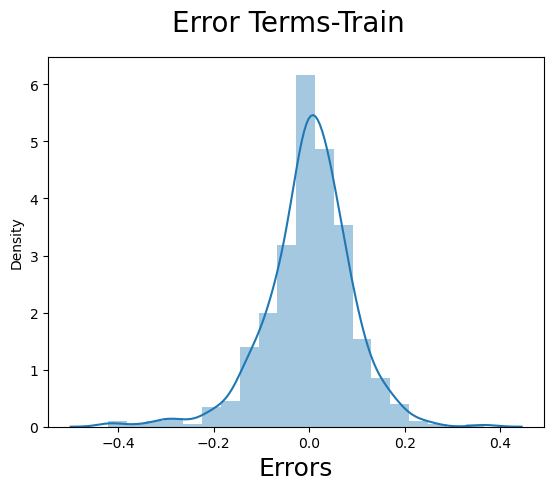

In [157]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms-Train', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#### Looking for patterns in the residuals

In [158]:
res = (y_train - y_train_pred)
res


653    0.133409
576    0.098656
426   -0.009565
728   -0.143824
482   -0.110633
         ...   
526    0.008446
578   -0.016416
53    -0.022932
350    0.017799
79    -0.062252
Length: 510, dtype: float64

In [159]:
X_train_rfe5.shape

(510, 12)

In [160]:
res.shape

(510,)

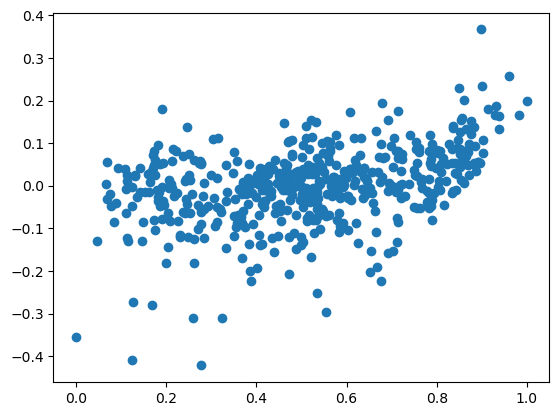

In [161]:
plt.scatter(y_train,res)
plt.show()

## Making Predictions

#### Applying the scaling on the test set

In [162]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,OCT,SEP,Light Snow,Mist,MON,SAT,SUN,THU,TUE,WED
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,1,0,0,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [163]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,OCT,SEP,Light Snow,Mist,MON,SAT,SUN,THU,TUE,WED
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [164]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,OCT,SEP,Light Snow,Mist,MON,SAT,SUN,THU,TUE,WED
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.027397,0.319635,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.163612,0.467403,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
#divide to X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [166]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new = X_test_new[X_train_rfe5.columns]
# Making predictions
y_test_pred = lm5.predict(X_test_new)
y_test_pred

184    0.489913
535    0.883242
299    0.399048
221    0.637145
152    0.590992
         ...   
400    0.329232
702    0.711274
127    0.467454
640    0.792864
72     0.275758
Length: 219, dtype: float64

## Model Evaluation

Text(0, 0.5, 'y_pred')

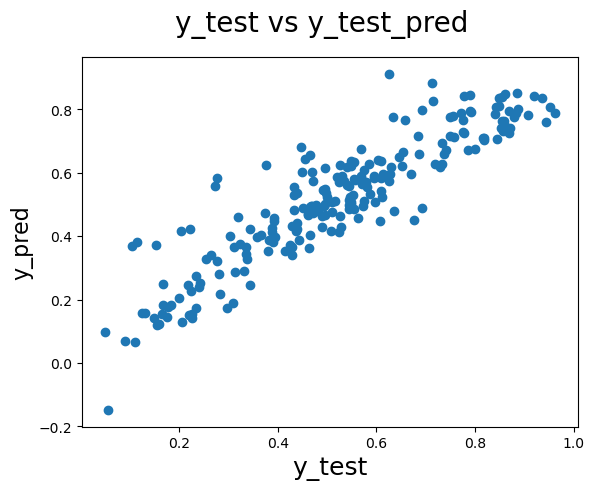

In [167]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

## Checking the R-squared 

In [168]:
from sklearn.metrics import r2_score
r_squared_test = r2_score(y_test, y_test_pred)
r_squared_test

0.8185825052009528

In [169]:
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_train

0.8379063590653595

Text(0.5, 0, 'Errors')

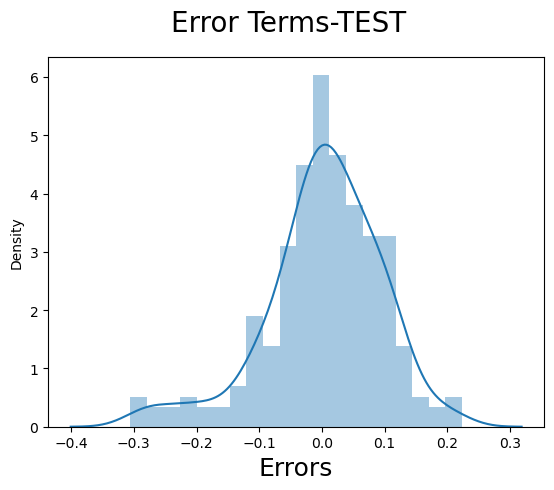

In [170]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms-TEST', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Adjusted R-Square value

#### Train Adjusted R-Square

In [171]:
train_row, train_col = X_train_rfe5.shape
print(train_row)
#removing const column from the count
train_col=train_col-1
print(train_col)

510
11


In [172]:
adj_train_rsquare=1-((1-r_squared_train)*(train_row-1)/(train_row-train_col-1))
adj_train_rsquare

0.8343259774382892

#### Test Adjusted R-Square

In [173]:
test_row, test_col = X_test_new.shape
print(test_row)
#removing const column from the count
test_col=test_col-1
print(test_col)

219
11


In [174]:
adj_test_rsquare=1-((1-r_squared_test)*(test_row-1)/(test_row-test_col-1))
adj_test_rsquare

0.808941961999071

### We can see that the equation of our best fitted line is:

 $ cnt = 0.3374+0.2309  \times  yr + 0.4795  \times  temp + 0.0551 \times winter + 0.0558 \times SEP 
- 0.1493 \times hum - 0.1699 \times windspeed - 0.1096 \times spring - 0.0768 \times JUL 
- 0.2457 \times Light Snow - 0.0570 \times Mist - 0.0413 \times TUE $

### Strong Positive predictor are
1) temp
2) yr
3) SEP
4) winter
